In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

***Data Description***

<u>Format:</u> CSV (each row represents an individual student)

<u>Features:</u>

ID: Unique identifier for each student

Demographics: Age, Gender, City

Academic Indicators: CGPA, Academic Pressure, Study Satisfaction

Lifestyle & Wellbeing: Sleep Duration, Dietary Habits, Work Pressure, Job Satisfaction, Work/Study Hours

Additional Factors: Profession, Degree, Financial Stress, Family History of Mental Illness, and whether the student has ever had suicidal thoughts

Target Variable:
Depression_Status: A binary indicator (0/1 or Yes/No) that denotes whether a student is experiencing depression

In [3]:
df = pd.read_csv("student_depression_dataset.csv")
df.head(20)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,'Less than 5 hours',Healthy,PhD,No,4.0,1.0,No,0
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,'7-8 hours',Healthy,BSc,No,1.0,2.0,No,0
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,'Less than 5 hours',Unhealthy,'Class 12',No,0.0,1.0,Yes,0
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,'7-8 hours',Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,'Less than 5 hours',Moderate,LLB,Yes,2.0,5.0,No,1


In [4]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [5]:
print(df.dtypes)

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object


In [6]:
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 40)

Unique values in 'Gender':
['Male' 'Female']
----------------------------------------
Unique values in 'City':
['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' "'Less Delhi'" 'City'
 '3.0' "'Less than 5 Kalyan'" 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini'
 'Nandini' 'Khaziabad']
----------------------------------------
Unique values in 'Profession':
['Student' "'Civil Engineer'" 'Architect' "'UX/UI Designer'"
 "'Digital Marketer'" "'Content Writer'" "'Educational Consultant'"
 'Teacher' 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
----------------------------------------
Unique values in 'Sleep Duration':
["'5-6 hours'" "'Les

In [7]:
invalid_cities_list = ['M.Tech', "'Less Delhi'", 'City', '3.0', "'Less than 5 Kalyan'", 'ME', 'M.Com']

# Find rows with invalid cities
invalid_entries = df[df['City'].isin(invalid_cities_list)]

# Count them
print(f"Number of invalid city entries: {len(invalid_entries)}")

# See which ones and how often
print(invalid_entries['City'].value_counts())

Number of invalid city entries: 8
City
City                    2
M.Tech                  1
'Less Delhi'            1
3.0                     1
'Less than 5 Kalyan'    1
ME                      1
M.Com                   1
Name: count, dtype: int64


In [8]:
city_counts = df['City'].value_counts()

# Print all cities and their counts
print(city_counts)

City
Kalyan                  1570
Srinagar                1372
Hyderabad               1340
Vasai-Virar             1290
Lucknow                 1155
Thane                   1139
Ludhiana                1111
Agra                    1094
Surat                   1078
Kolkata                 1066
Jaipur                  1036
Patna                   1007
Visakhapatnam            969
Pune                     968
Ahmedabad                951
Bhopal                   934
Chennai                  885
Meerut                   825
Rajkot                   816
Delhi                    768
Bangalore                767
Ghaziabad                745
Mumbai                   699
Vadodara                 694
Varanasi                 685
Nagpur                   651
Indore                   643
Kanpur                   609
Nashik                   547
Faridabad                461
Saanvi                     2
Bhavna                     2
City                       2
Harsha                     2
Kibara   

In [9]:
profession_counts = df['Profession'].value_counts()
print(profession_counts)
print(len(profession_counts))

Profession
Student                     27870
Architect                       8
Teacher                         6
'Digital Marketer'              3
'Content Writer'                2
Chef                            2
Doctor                          2
Pharmacist                      2
'Civil Engineer'                1
'UX/UI Designer'                1
'Educational Consultant'        1
Manager                         1
Lawyer                          1
Entrepreneur                    1
Name: count, dtype: int64
14


In [10]:
invalid_sleep_list = ['Others']

# Find rows with invalid cities
invalid_entries = df[df['Sleep Duration'].isin(invalid_sleep_list)]

# Count them
print(f"Number of invalid sleep duration entries: {len(invalid_entries)}")

# See which ones and how often
print(invalid_entries['Sleep Duration'].value_counts())

Number of invalid sleep duration entries: 18
Sleep Duration
Others    18
Name: count, dtype: int64


In [11]:
invalid_diet_list = ['Others']

# Find rows with invalid cities
invalid_entries = df[df['Dietary Habits'].isin(invalid_diet_list)]

# Count them
print(f"Number of invalid diet entries: {len(invalid_entries)}")

# See which ones and how often
print(invalid_entries['Dietary Habits'].value_counts())

Number of invalid diet entries: 12
Dietary Habits
Others    12
Name: count, dtype: int64


In [12]:


invalid_financial_list = ['?']

# Find rows with invalid cities
invalid_entries = df[df['Financial Stress'].isin(invalid_financial_list)]

# Count them
print(f"Number of invalid financial entries: {len(invalid_entries)}")

# See which ones and how often
print(invalid_entries['Financial Stress'].value_counts())

Number of invalid financial entries: 3
Financial Stress
?    3
Name: count, dtype: int64


In [13]:
invalid_entries = df[df['Sleep Duration'].isin(invalid_sleep_list)]
invalid_entries

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1963,10030,Female,30.0,Ludhiana,Student,3.0,0.0,5.42,2.0,0.0,Others,Unhealthy,B.Ed,Yes,1.0,2.0,No,0
3807,19051,Female,18.0,Agra,Student,3.0,0.0,6.03,4.0,0.0,Others,Unhealthy,BA,Yes,12.0,5.0,No,1
3984,19915,Female,27.0,Ludhiana,Student,4.0,0.0,5.08,5.0,0.0,Others,Healthy,M.Tech,Yes,8.0,5.0,Yes,1
4535,22742,Female,22.0,Srinagar,Student,4.0,0.0,6.92,3.0,0.0,Others,Moderate,MCA,Yes,3.0,3.0,Yes,1
5526,27865,Female,31.0,Delhi,Student,2.0,0.0,7.27,5.0,0.0,Others,Healthy,B.Arch,No,3.0,1.0,No,0
5786,29050,Male,23.0,Mumbai,Student,5.0,0.0,8.52,4.0,0.0,Others,Moderate,BE,Yes,12.0,4.0,Yes,1
6740,33836,Male,20.0,Vasai-Virar,Student,3.0,0.0,6.37,2.0,0.0,Others,Unhealthy,BSc,No,10.0,1.0,No,0
7696,38701,Male,31.0,Kalyan,Student,3.0,0.0,8.21,4.0,0.0,Others,Moderate,BA,No,2.0,3.0,No,0
7875,39566,Female,28.0,Visakhapatnam,Student,4.0,0.0,6.38,5.0,0.0,Others,Moderate,M.Ed,No,8.0,3.0,No,0
12933,65456,Male,28.0,Nagpur,Student,2.0,0.0,7.85,4.0,0.0,Others,Unhealthy,BA,Yes,10.0,4.0,No,1


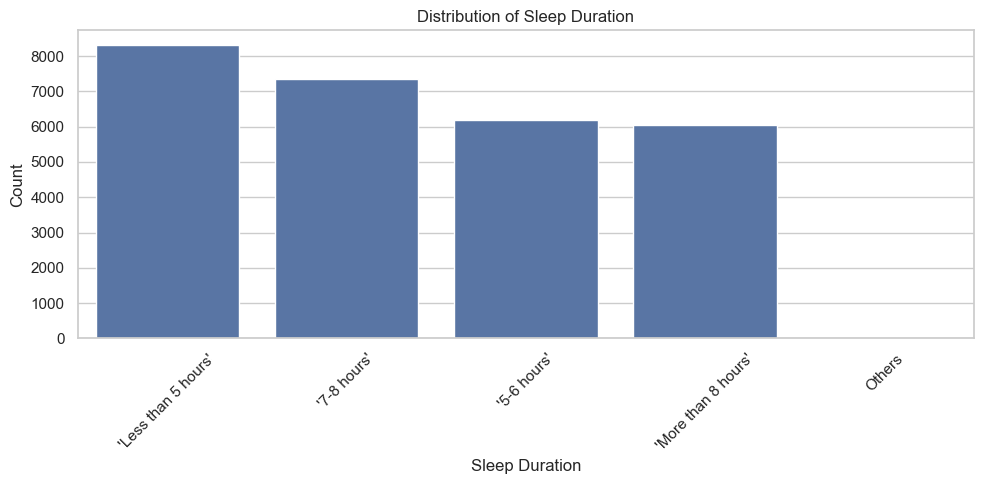

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Bar plot of sleep duration counts
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Sleep Duration', order=df['Sleep Duration'].value_counts().index)

# Add labels and title
plt.title("Distribution of Sleep Duration")
plt.xlabel("Sleep Duration")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [15]:
'''
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Grouped bar plot: Sleep Duration on X, bars colored by Profession
sns.countplot(data=df, x='Academic Pressure', hue='Sleep Duration')

plt.title('Sleep Duration by Profession')
plt.xlabel('Sleep Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Profession', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
'''

"\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize=(12, 6))\n\n# Grouped bar plot: Sleep Duration on X, bars colored by Profession\nsns.countplot(data=df, x='Academic Pressure', hue='Sleep Duration')\n\nplt.title('Sleep Duration by Profession')\nplt.xlabel('Sleep Duration')\nplt.ylabel('Count')\nplt.xticks(rotation=45)\nplt.legend(title='Profession', bbox_to_anchor=(1.05, 1), loc='upper left')\n\nplt.tight_layout()\nplt.show()\n"